<a href="https://colab.research.google.com/github/Bharathi-05/ML-algorithms/blob/main/Copy_of_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving loan_smalldataset.csv to loan_smalldataset.csv


In [ ]:
df = pd.read_csv('loan_smalldataset.csv')
print(df)


    ApplicantIncome  CoapplicantIncome  LoanAmount
0            5849.0                0.0         NaN
1            4583.0                NaN       128.0
2            3000.0                0.0        66.0
3            2583.0             2358.0       120.0
4               NaN                0.0       141.0
5            5417.0             4196.0       267.0
6            2333.0             1516.0         NaN
7            3036.0             2504.0       158.0
8            4006.0             1526.0       168.0
9           12841.0            10968.0       349.0
10           3200.0              700.0        70.0
11           2500.0             1840.0       109.0
12              NaN             8106.0         NaN
13           1853.0             2840.0       114.0
14           1299.0             1086.0        17.0
15           4950.0                0.0       125.0


In [ ]:
mean_value = df['ApplicantIncome'].mean()
df['ApplicantIncome'].fillna(mean_value, inplace=True)
mean_value = df['CoapplicantIncome'].mean()
df['CoapplicantIncome'].fillna(mean_value, inplace=True)
mean_value = df['LoanAmount'].mean()
df['LoanAmount'].fillna(mean_value, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    16 non-null     float64
 1   CoapplicantIncome  16 non-null     float64
 2   LoanAmount         16 non-null     float64
dtypes: float64(3)
memory usage: 512.0 bytes


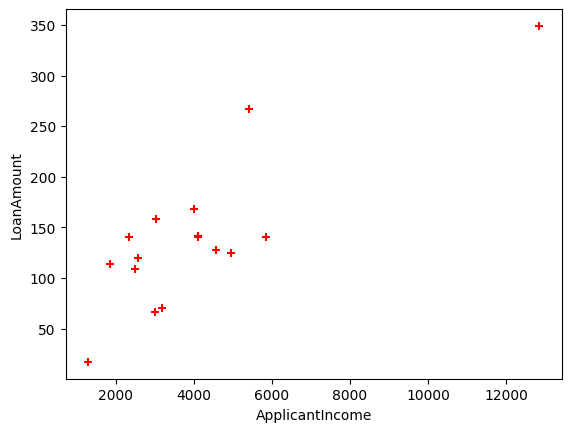

In [ ]:
%matplotlib inline
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.scatter(df.ApplicantIncome,df.
            LoanAmount,color='red',marker='+')

In [ ]:
df = df.dropna()
print(df)

    ApplicantIncome  CoapplicantIncome  LoanAmount
0       5849.000000           0.000000  140.923077
1       4583.000000        2509.333333  128.000000
2       3000.000000           0.000000   66.000000
3       2583.000000        2358.000000  120.000000
4       4103.571429           0.000000  141.000000
5       5417.000000        4196.000000  267.000000
6       2333.000000        1516.000000  140.923077
7       3036.000000        2504.000000  158.000000
8       4006.000000        1526.000000  168.000000
9      12841.000000       10968.000000  349.000000
10      3200.000000         700.000000   70.000000
11      2500.000000        1840.000000  109.000000
12      4103.571429        8106.000000  140.923077
13      1853.000000        2840.000000  114.000000
14      1299.000000        1086.000000   17.000000
15      4950.000000           0.000000  125.000000


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values


<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

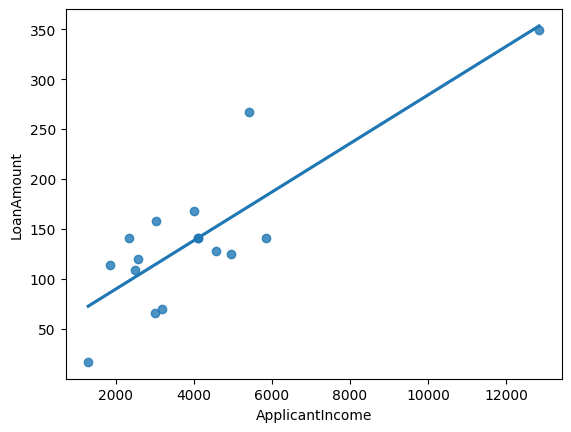

In [ ]:
import seaborn as sb
sb.regplot(x = "ApplicantIncome",
            y = "LoanAmount",
            ci = None,
            data = df)

In [ ]:
from sklearn.model_selection import train_test_split
#random_state is a parameter in train_test_split that controls the random number generator used to shuffle the data before splitting it
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
y_pred = regressor.predict(X_test)
regressor.score(X_test,y_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


2.2737367544323206e-13


,Actual,Predicted
0,2509.333333,2509.333333
1,1516.000000,1516.000000
2,1526.000000,1526.000000
3,10968.000000,10968.000000


In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print('r2 score for perfect model is', r2)


Mean Absolute Error: 5.684341886080801e-13
Mean Squared Error: 8.788794008375919e-25
Root Mean Squared Error: 9.374856803373542e-13
r2 score for perfect model is 1.0
